# **Data Understanding**

# 0.0. Imports

In [2]:
import pandas                                                           as pd
import numpy                                                            as np
import seaborn                                                          as sns
import matplotlib.pyplot                                                as plt

from sklearn                        import model_selection              as ms

from IPython.core.display           import HTML
from IPython.display                import Image
import warnings
warnings.filterwarnings('ignore')

## 0.1. Helper Functions

In [3]:
def jupyter_settings():
    %matplotlib inline

    plt.style.use('fivethirtyeight')
    plt.rcParams['figure.figsize'] = [20,10]
    plt.rcParams['font.size'] = 24
    plt.rcParams['font.family'] = 'serif'
    plt.rcParams['font.serif'] = 'Ubuntu'
    plt.rcParams['font.monospace'] = 'Ubuntu Mono'
    plt.rcParams['font.size'] = 12
    plt.rcParams['axes.labelsize'] = 14
    plt.rcParams['axes.labelweight'] = 'bold'
    plt.rcParams['font.weight'] = 'bold'
    plt.rcParams['axes.titlesize'] = 15
    plt.rcParams['xtick.labelsize'] = 13
    plt.rcParams['ytick.labelsize'] = 13
    plt.rcParams['legend.fontsize'] = 12
    plt.rcParams['figure.titlesize'] = 12
    
    display(HTML ('<style>.container {width: 80% !important;}</style>'))
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option('display.expand_frame_repr', False)
        
    palette = ["#856088","#7BA05B", "#7BAFD4", "#FFC40C", "#B53389"]
    colors = sns.color_palette(palette=palette)
    sns.set_palette(colors)
    
jupyter_settings()
    

## 0.2. Loading Data

In [4]:
df_raw = pd.read_csv('../data/raw/train.csv')

# 1.0. Data Description

## 1.1. Split Dataframe into Training and Validation Dataset

In [4]:
# separar dados de treino e validacao
X = df_raw.drop ('Response', axis=1)
y = df_raw['Response'].copy()

x_train, x_validation, y_train, y_validation = ms.train_test_split (X, y, test_size=0.20)

In [5]:
x_train, x_test, y_train, y_test = ms.train_test_split (x_train, y_train, test_size=0.20)


train = pd.concat ([x_train, y_train], axis=1)
validation = pd.concat ([x_validation, y_validation], axis=1)
test = pd.concat ([x_test, y_test], axis=1)

In [23]:
train.shape[0], validation.shape[0], test.shape[0]

(243909, 76222, 60978)

In [7]:
train.to_csv('../data/processed/train.csv', index=False)
validation.to_csv('../data/processed/validation.csv', index=False)
test.to_csv('../data/processed/test.csv', index=False)

In [8]:
df1 = pd.concat([train, validation, test])
df1 = df1.sort_values(by='id')
df1.reset_index(drop=True, inplace=True)

In [6]:
df1.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


## 1.1. Rename Columns

In [7]:
df1.columns = [x.lower() for x in df1.columns]
df1 = df1.rename(columns={'vintage' :'days_associated'})

df1.columns

Index(['id', 'gender', 'age', 'driving_license', 'region_code',
       'previously_insured', 'vehicle_age', 'vehicle_damage', 'annual_premium',
       'policy_sales_channel', 'days_associated', 'response'],
      dtype='object')

## 1.2. Data Dimensions

In [8]:
print ('Number os Rows: {}'.format (df1.shape[0]))
print ('Number os Columns: {}'.format (df1.shape[1]))

Number os Rows: 381109
Number os Columns: 12


## 1.3. Data Types

In [9]:
df1.dtypes

id                        int64
gender                   object
age                       int64
driving_license           int64
region_code             float64
previously_insured        int64
vehicle_age              object
vehicle_damage           object
annual_premium          float64
policy_sales_channel    float64
days_associated           int64
response                  int64
dtype: object

## 1.4. Check NA

In [10]:
df1.isna().sum()

id                      0
gender                  0
age                     0
driving_license         0
region_code             0
previously_insured      0
vehicle_age             0
vehicle_damage          0
annual_premium          0
policy_sales_channel    0
days_associated         0
response                0
dtype: int64

## 1.5. Descriptive Statistical

In [11]:
num_attributes = df1.select_dtypes (include = ['int64', 'float64'])
cat_attributes = df1.select_dtypes (exclude = ['int64', 'float64'])

### 1.5.1. Numerical Attributes

In [12]:
# central tendency - mean, median
ct1 = pd.DataFrame (num_attributes.apply (np.mean)).T
ct2 = pd.DataFrame (num_attributes.apply (np.median)).T

#dispersion - std, min, max, skew, kurtosis
d1 = pd.DataFrame (num_attributes.apply (np.std)).T
d2 = pd.DataFrame (num_attributes.apply (min)).T
d3 = pd.DataFrame (num_attributes.apply (max)).T
d4 = pd.DataFrame (num_attributes.apply (lambda x : x.max() - x.min())).T
d5 = pd.DataFrame (num_attributes.apply (lambda x: x.skew())).T
d6 = pd.DataFrame (num_attributes.apply (lambda x: x.kurtosis())).T

#concatenate
r = pd.concat([d2,d3,d4,ct1,ct2,d1,d5,d6]).T.reset_index()
r.columns = ['attributes','min', 'max', 'range', 'mean', 'median', 'std','skew', 'kurtosis']
r

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,id,1.0,381109.0,381108.0,190555.000000,190555.0,110016.691870,9.443274e-16,-1.200000
1,age,20.0,85.0,65.0,38.822584,36.0,15.511591,6.725390e-01,-0.565655
2,driving_license,0.0,1.0,1.0,0.997869,1.0,0.046109,-2.159518e+01,464.354302
3,region_code,0.0,52.0,52.0,26.388807,28.0,13.229871,-1.152664e-01,-0.867857
4,previously_insured,0.0,1.0,1.0,0.458210,0.0,0.498251,1.677471e-01,-1.971871
5,annual_premium,2630.0,540165.0,537535.0,30564.389581,31669.0,17213.132474,1.766087e+00,34.004569
6,policy_sales_channel,1.0,163.0,162.0,112.034295,133.0,54.203924,-9.000081e-01,-0.970810
7,days_associated,10.0,299.0,289.0,154.347397,154.0,83.671194,3.029517e-03,-1.200688
8,response,0.0,1.0,1.0,0.122563,0.0,0.327935,2.301906e+00,3.298788


# 2.0. Feature Engineering

In [13]:
df2 = df1.copy()

## 2.1. Mental Map of Hypotheses

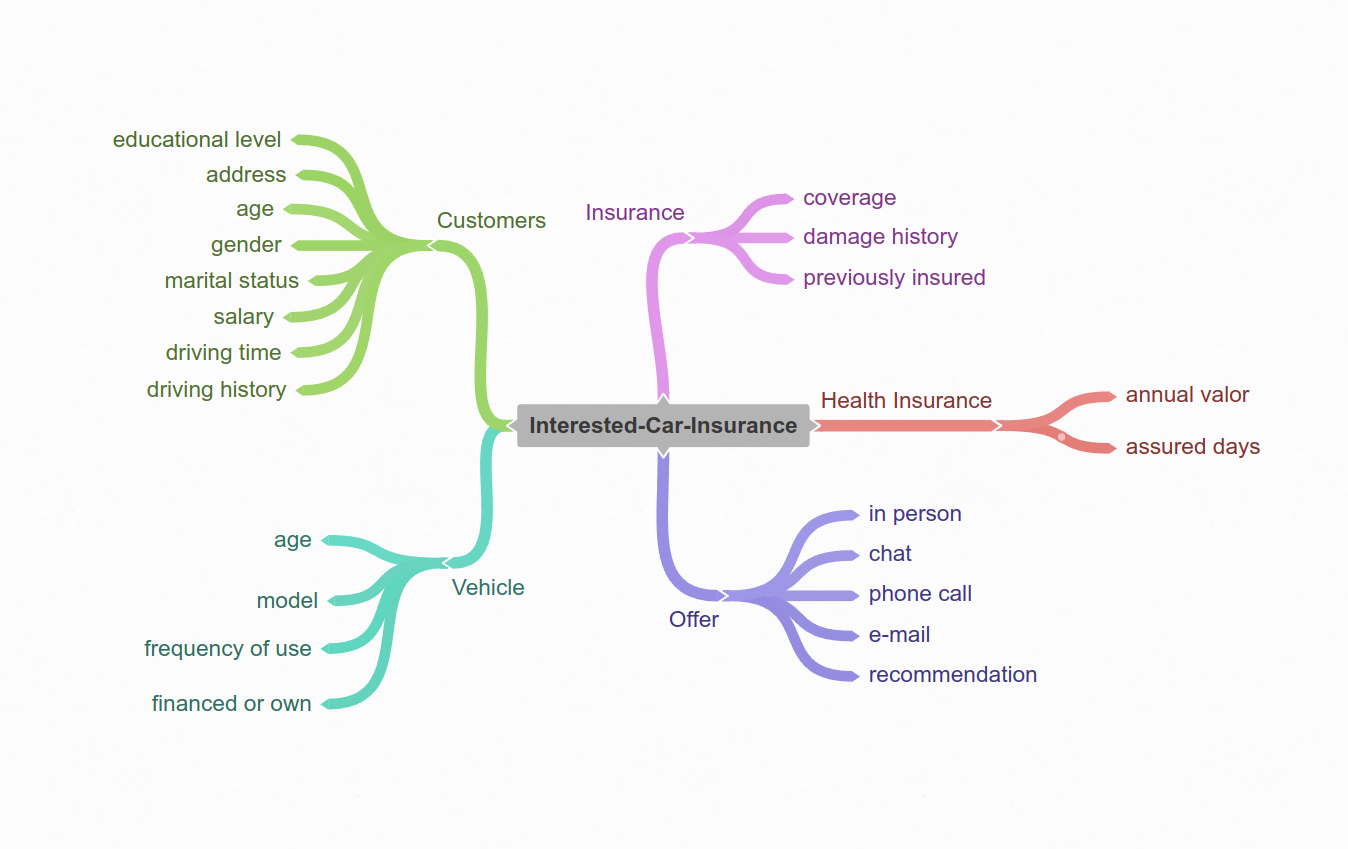

In [14]:
Image('../img/MindMapHypothesis.png')

## 2.2. Final List of Hypotheses

*H1- Os clientes mais interessados em contratar um seguro automóvel são as mulheres*

*H2 - Os clientes menos interessados em contratar um seguro automóvel são os que não possuem carteira de habilitação*

*H3 - O canal mais utilizado é o canal com mais clientes interessados em comprar o seguro automóvel*

*H4 - Os clientes mais interessados em contratar um seguro automóvel são os com mais idade*

*H5 - Os clientes mais interessados em comprar um seguro automóvel são os que têm mais dias associados*

*H6 - Os clientes menos interessados em contratar um seguro automóvel são os que pagam mais de ₹30.000 no seguro saúde*

*H7 - Os clientes menos interessados em contratar um seguro automóvel são os que já possuem seguro automóvel*

*H8- Os clientes mais interessados em contratar um seguro automóvel são o que possuem um modelo mais novo*

*H9 - Os clientes mais interessados em contratar um seguro automóvel são os que possuem um histórico de danos ao veículo*

## 2.3. Feature Engineering

#### Seguro Vida

- **Idade**: O principal fator que afeta a taxa de prêmio do seguro de vida é a sua idade. Os mais jovens são mais saudáveis ​​e menos arriscados para a seguradora cobrir, uma vez que a probabilidade de sinistros será menor. À medida que envelhece, você se torna mais suscetível a problemas médicos. 

- **Gênero**: As mulheres, em média, tendem a viver mais do que os homens e, portanto, as seguradoras cobram-lhes prémios mais baixos.

- **Registro de condução**: DUI(dirigir sob influência) e condenações por condução imprudente, ou licenças suspensas ou revogadas, muitas vezes levarão a taxas mais elevadas.

#### Seguro Automóvel

- **Idade e Gênero**: podem afetar o prêmio do seguro automóvel. Os condutores mais jovens e menos experientes pagam frequentemente mais pelo seguro automóvel do que os condutores mais velhos. 

    Os jovens entre os 17 e os 25 anos pagam frequentemente mais, visto que estatisticamente são mais propensos a reclamar e normalmente têm menos anos de experiência de condução. Os condutores mais velhos também podem enfrentar prémios mais elevados à medida que a frequência de acidentes aumenta após os 60 anos.

    Estatisticamente, as mulheres tendem a sofrer menos acidentes, a sofrer menos acidentes com condutores sob influência de álcool (DUI) e – o mais importante – a sofrer menos acidentes graves do que os homens. Assim sendo, todas as outras coisas sendo iguais, as mulheres muitas vezes pagam menos pelo seguro automóvel do que os seus homólogos masculinos

- **Histórico de condução**: Se sofreu vários acidentes, é provável que o custo do seguro automóvel seja maior do que o de alguém com histórico de direção limpo. Se é um novo motorista e nunca fez seguro antes, é provável que pague mais pelo seguro automóvel.

- **Residência**: O local onde mora e onde estaciona seu carro durante a noite pode afetar o prêmio do seguro automóvel. Os bairros urbanos têm normalmente taxas mais elevadas de acidentes, roubos e vandalismo do que as áreas rurais, o que significa que os prémios podem ser mais elevados.



### 2.3.1 Complete 

In [15]:

# vehicle_age
df2['vehicle_age'] = df2['vehicle_age'].apply (lambda x: 'over_2_years' if x == '> 2 Years' 
                                                                        else 'between_1_2_year' if x == '1-2 Year' 
                                                                        else 'below_1_year')

# vehicle_damge
df2['vehicle_damage'] = df2['vehicle_damage'].apply (lambda x: 1 if x == 'Yes' else 0)

### 2.3.2 Train

In [16]:
train_enco = train.copy()

In [17]:
train_enco.columns = [x.lower() for x in train_enco.columns]
train_enco = train_enco.rename(columns={'vintage' :'days_associated'})

# vehicle_age
train_enco['vehicle_age'] = train_enco['vehicle_age'].apply (lambda x: 'over_2_years' if x == '> 2 Years' 
                                                                        else 'between_1_2_year' if x == '1-2 Year' 
                                                                        else 'below_1_year')

# vehicle_damge
train_enco['vehicle_damage'] = train_enco['vehicle_damage'].apply (lambda x: 1 if x == 'Yes' else 0)

### 2.3.3 Validation

In [18]:
val_enco = validation.copy()

In [19]:
val_enco.columns = [x.lower() for x in val_enco.columns]
val_enco = val_enco.rename(columns={'vintage' :'days_associated'})

# vehicle_age
val_enco['vehicle_age'] = val_enco['vehicle_age'].apply (lambda x: 'over_2_years' if x == '> 2 Years' 
                                                                        else 'between_1_2_year' if x == '1-2 Year' 
                                                                        else 'below_1_year')

# vehicle_damge
val_enco['vehicle_damage'] = val_enco['vehicle_damage'].apply (lambda x: 1 if x == 'Yes' else 0)


### 2.3.4 Test

In [20]:
test_enco = test.copy()

In [21]:
test_enco.columns = [x.lower() for x in test_enco.columns]
test_enco = test_enco.rename(columns={'vintage' :'days_associated'})

# vehicle_age
test_enco['vehicle_age'] = test_enco['vehicle_age'].apply (lambda x: 'over_2_years' if x == '> 2 Years' 
                                                                        else 'between_1_2_year' if x == '1-2 Year' 
                                                                        else 'below_1_year')

# vehicle_damge
test_enco['vehicle_damage'] = test_enco['vehicle_damage'].apply (lambda x: 1 if x == 'Yes' else 0)


In [25]:
train_enco.to_csv('../data/interim/train_feature_engineering.csv', index=False)
val_enco.to_csv('../data/interim/validation_feature_engineering.csv', index=False)
test_enco.to_csv('../data/interim/test_feature_engineering.csv', index=False)

# 3.0. Variable Filters

In [22]:
df3 = df2.copy()

In [27]:
df3.to_csv('../data/interim/df3_data_description_done.csv', index=False)